<a href="https://colab.research.google.com/github/gulabpatel/Anomaly_Detection_Python/blob/main/8%3A%20EllipticEnvelope_Anomaly_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import libraries**

In [4]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.covariance import EllipticEnvelope
import matplotlib.pyplot as plt

**Get the training data**

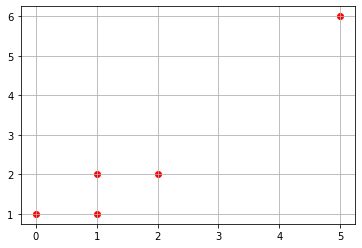

In [5]:
# create a dataframe
df = pd.DataFrame(np.array([[0,1], [1,1], [1,2], [2,2], [5,6]]), columns = ["x", "y"], index = [0,1,2,3,4])
# show data in a scatterplot
plt.scatter(df["x"], df["y"], color = "r")
plt.grid()

In [3]:
# convert dataframe to arrays
data = df[['x', 'y']].values

**Modeling**


The most important parameter in defining the model is to set the “contamination” parameter, which basically defines the proportion of values that will be identified as outliers. The parameter value ranges between 0 and 0.5

In [6]:
# instantiate model
model1 = EllipticEnvelope(contamination = 0.1) 
# fit model
model1.fit(data)

EllipticEnvelope(assume_centered=False, contamination=0.1, random_state=None,
                 store_precision=True, support_fraction=None)

**Prediction**

In [7]:
# new data for prediction (data needs to be in arrays)
new_data = np.array([[10,10], [1,1], [1,1], [1,1]])
# predict on new data 
pred1 = model1.predict(new_data)
print(pred1)

[-1  1  1  1]


**Example 2:**

In [9]:
import pandas as pd
import numpy as np

from sklearn.covariance import EllipticEnvelope

df = pd.read_csv('https://raw.githubusercontent.com/gulabpatel/Anomaly_Detection_Python/master/dataset/Salary.txt')
df

,ID,Age,Salary
0,1001,33,81200
1,1002,25,63537
2,1003,24,51963
3,1004,23,40199
4,1005,34,39347
...,...,...,...
594,1602,28,874
595,1603,29,845
596,1604,33,616
597,1605,32,410


In [11]:
features = df.iloc[:,:].values

outliers = EllipticEnvelope(contamination=0.1)

outliers.fit(features)
prediction = outliers.predict(features)

print(prediction)

df['outliers'] = prediction
df

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1

,ID,Age,Salary,outliers
0,1001,33,81200,-1
1,1002,25,63537,-1
2,1003,24,51963,-1
3,1004,23,40199,-1
4,1005,34,39347,-1
...,...,...,...,...
594,1602,28,874,1
595,1603,29,845,1
596,1604,33,616,1
597,1605,32,410,1
